In [4]:
import numpy as np
import matplotlib.pyplot as plt
import jax.scipy as jsp

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import dLux.utils as dlu
import pandas as pd

cmap = plt.get_cmap('inferno')
cmap.set_bad('k')

import warnings; warnings.simplefilter('ignore')


SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 1999-03-22                     FILENAME= 'nic1_para1_002.fits' / name of file                                  DESCRIP = 'NICMOS camera 1 first paraboloid mirror'                             DBTABLE = 'CRTHROUGHPUT'                                                        COMPNAME= 'nic1_para1'                  

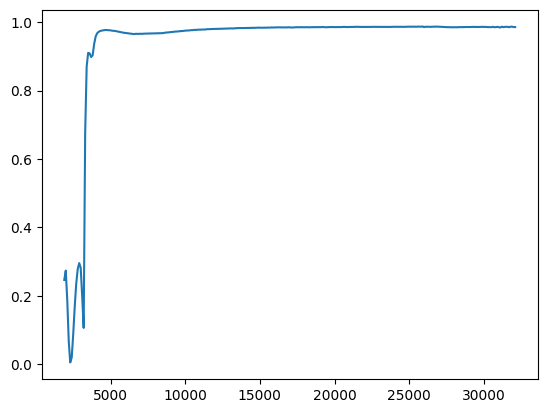

In [5]:
fname = "nic1_para1_004_syn.fits"#"nic1_f110w_013_syn.fits"
data = fits.getdata(fname, ext=1)
print(fits.getheader(fname, ext=0))
hdul =fits.open(fname)
hdul.info()
hdul.close()
plt.plot(data['WAVELENGTH'], data['THROUGHPUT'])

In [6]:
fname = "nic1_dqe_008_syn.fits"#"nic1_f110w_013_syn.fits"
dqe = fits.getdata(fname, ext=1)
fname = "nic1_f110w_013_syn.fits"
f110w_st = fits.getdata(fname, ext=1)

#print(fits.getheader(fname, ext=0))
#hdul =fits.open(fname)
#hdul.info()
#hdul.close()

In [7]:
good = (dqe['WAVELENGTH'] > np.min(f110w_st['WAVELENGTH'])) & (dqe['WAVELENGTH'] < np.max(f110w_st['WAVELENGTH']))

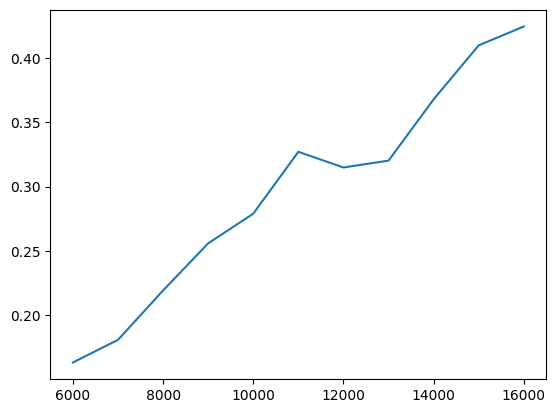

In [8]:
plt.plot(dqe['WAVELENGTH'][good], dqe['THROUGHPUT'][good])

In [9]:
len(f110w_st['WAVELENGTH'])

2003

In [10]:
f110w_man_wvs = f110w_st['WAVELENGTH']
f11o_man_throughput = f110w_st['THROUGHPUT']*np.interp(f110w_st['WAVELENGTH'],dqe['WAVELENGTH'], dqe['THROUGHPUT'])*(f110w_st['WAVELENGTH']/1e4)

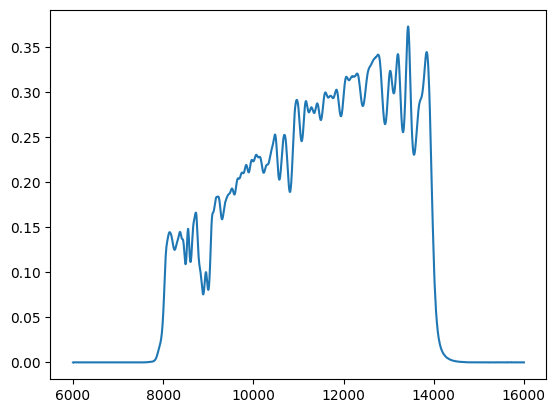

In [11]:
plt.plot(f110w_man_wvs, f11o_man_throughput)

In [12]:
fname = "U10102.fits"#"L5_2MASSJ1507-1627.fits"
data = fits.getdata(fname, ext=0)

In [13]:
data_hst_all = pd.read_csv("2m1507.csv")

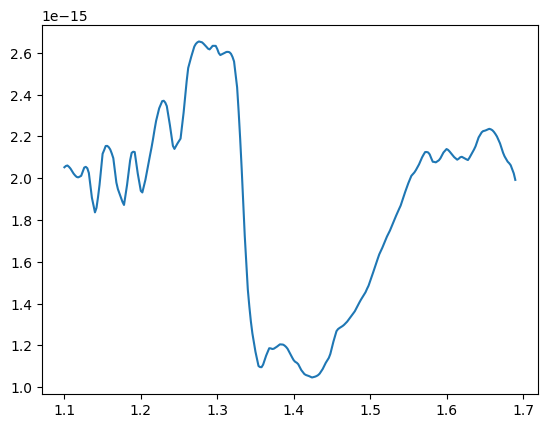

In [14]:
plt.plot(data_hst_all['wavelength'],data_hst_all['flux'])

In [15]:
def get_filter(file):
    flt = np.asarray(pd.read_csv(file, sep=' '))#[::20,:]

    wv = flt[:,0]
    bp = flt[:,1]

    ebp = bp*(wv/1e4)

    nebp = ebp/np.sum(ebp)*(np.max(wv)-np.min(wv))*0.01
    flt[:,1] = (nebp)
    return flt
    
f110w = get_filter("../data/HST_NICMOS1.F110W.dat")[120:-150]#[80:-150]

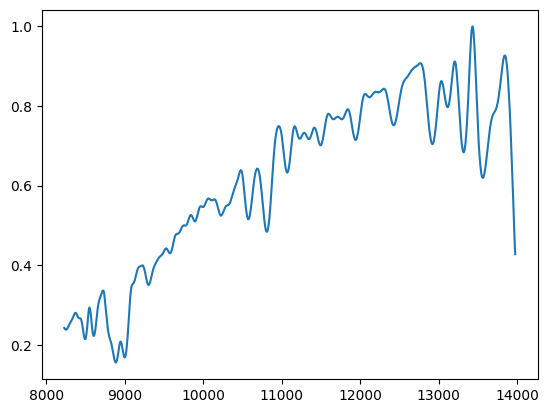

In [16]:
plt.plot(f110w[:,0], f110w[:,1]/np.max(f110w[:,1]))
#plt.plot(f110w_man_wvs, f11o_man_throughput/np.max(f11o_man_throughput))

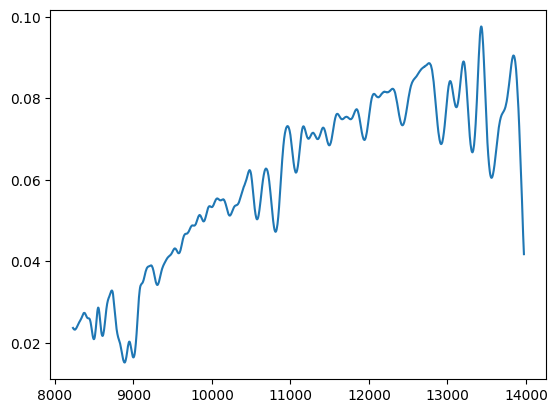

In [17]:
f110w_plotting = get_filter("../data/HST_NICMOS1.F110W.dat")
plt.plot(f110w[:,0], f110w[:,1])

In [18]:
def calc_throughput(filt, nwavels=9):

    filtr = filt


    wl_array = filtr[:,0]
    throughput_array = filtr[:,1]

    # filter_path = os.path.join()
    #file_path = pkg.resource_filename(__name__, f"/data/filters/{filt}.dat")
    #wl_array, throughput_array = np.array(onp.loadtxt(file_path, unpack=True))

    edges = np.linspace(wl_array.min(), wl_array.max(), nwavels + 1)
    wavels = np.linspace(wl_array.min(), wl_array.max(), 2 * nwavels + 1)[1::2]

    areas = []
    for i in range(nwavels):
        cond1 = edges[i] < wl_array
        cond2 = wl_array < edges[i + 1]
        throughput = np.where(cond1 & cond2, throughput_array, 0)
        areas.append(jsp.integrate.trapezoid(y=throughput, x=wl_array))

    areas = np.array(areas)
    weights = areas / areas.sum()

    wavels *= 1e-10
    return np.array([wavels, weights])

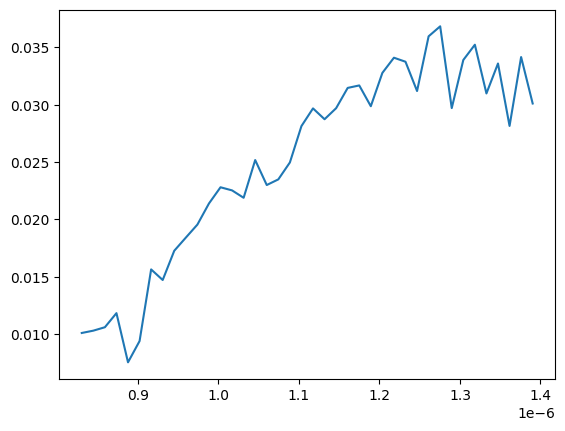

In [19]:
fw = calc_throughput(f110w,40)
plt.plot(fw[0,:], fw[1,:])

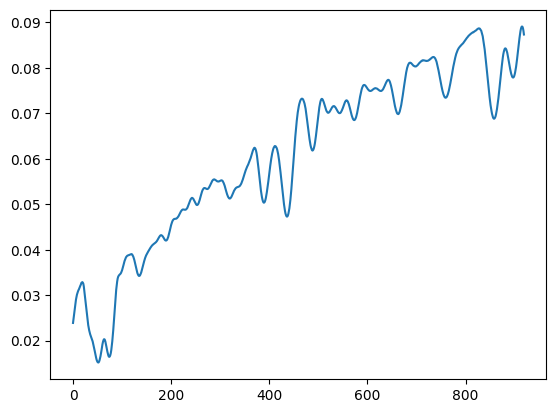

In [20]:
plt.plot(f110w[80:-150,1])

In [21]:
np.min(f110w[:,0])#/1e4

np.float64(8230.0)

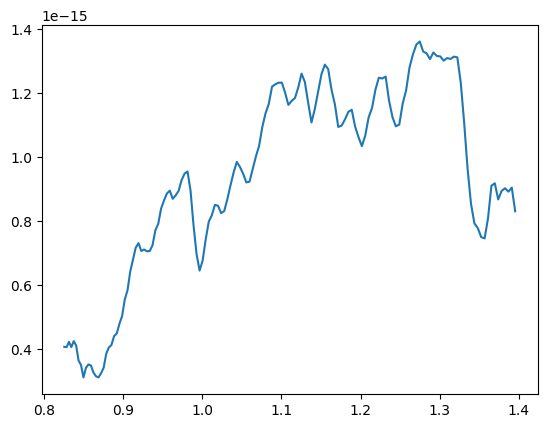

In [22]:
#plt.plot(data[0,:])
wv = data[0,:]
good = np.logical_and(wv>np.min(f110w[:,0]/1e4), wv < np.max(f110w[:,0]/1e4))
plt.plot(data[0,good], data[1,good])

In [23]:
ln = len(data[0, good])
xs =  np.arange(ln)*2*np.pi/ln#np.linspace(0, 2*np.pi, len(data[0,good]))

spec_f = np.zeros(156)

for i in range(156):
    spec_f[i] = (np.nansum(np.cos(xs * i/2) * np.log10(data[1,good]*data[0,good]*1e14)))/np.sum(np.cos(xs * i/2)**2)

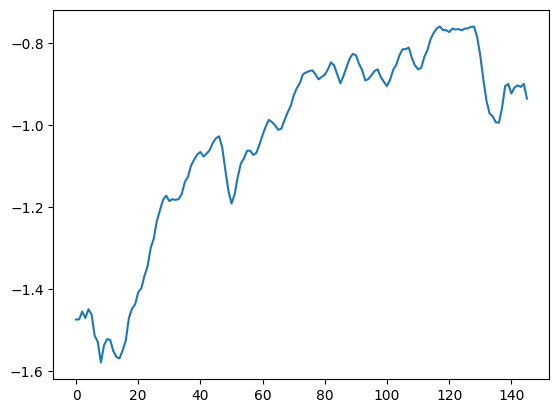

In [24]:
plt.plot(np.log10(data[1,good]*data[0,good]*1e14))

In [25]:
spec_f

array([-1.03646245, -0.29984712, -0.14137265, -0.04618831, -0.05788671,
       -0.02545625, -0.03688181,  0.0231736 ,  0.02356589, -0.00177967,
        0.01542216, -0.01978784,  0.01573202, -0.01738085,  0.01697396,
       -0.0201129 ,  0.00106766, -0.02870797, -0.01499311, -0.01143298,
        0.00538493, -0.01278138, -0.00948565, -0.01137698, -0.01581374,
       -0.0066309 , -0.01239131, -0.01330048, -0.00514719, -0.02077434,
       -0.00302916, -0.01526835,  0.00441104, -0.00903552, -0.00859704,
       -0.02840693, -0.00319441, -0.02146056, -0.00275854, -0.01451096,
       -0.010504  , -0.02542016, -0.00652044, -0.01400861, -0.00653468,
       -0.01771195, -0.00379869, -0.0187362 , -0.00487788, -0.01451772,
       -0.0016387 , -0.0143663 , -0.00251346, -0.01507657, -0.00374979,
       -0.01406717, -0.00398105, -0.01233988, -0.0053052 , -0.01574444,
       -0.00365342, -0.01406722, -0.00453491, -0.01442667, -0.0043144 ,
       -0.01646821, -0.00395341, -0.01602847, -0.00309382, -0.01

In [26]:
ln

146

In [27]:
sw = [ 2.345644  , -0.26959807, -0.12697683,  0.02899844, -0.00301863,
        0.01551046,  0.07165036, -0.01931788,  0.09078082,  0.06628606]

In [28]:
#fit_wvs = [807.9958333333335, 817.9875000000001, 827.9791666666667, 837.9708333333332, 847.9625, 857.9541666666669, 867.9458333333332, 877.9375000000001, 887.9291666666668, 897.9208333333332, 907.9125, 917.9041666666668, 927.8958333333333, 937.8875, 947.8791666666667, 957.8708333333334, 967.8625, 977.8541666666665, 987.8458333333333, 997.8375000000001, 1007.8291666666669, 1017.8208333333332, 1027.8125, 1037.804166666667, 1047.7958333333333, 1057.7875000000001, 1067.7791666666667, 1077.7708333333333, 1087.7625, 1097.7541666666666, 1107.7458333333334, 1117.7375, 1127.7291666666667, 1137.7208333333333, 1147.7125, 1157.7041666666667, 1167.6958333333334, 1177.6875000000002, 1187.679166666667, 1197.6708333333336, 1207.6625, 1217.6541666666667, 1227.6458333333333, 1237.6375, 1247.6291666666666, 1257.6208333333334, 1267.6125, 1277.6041666666667, 1287.5958333333335, 1297.5875, 1307.5791666666667, 1317.5708333333334, 1327.5625000000002, 1337.5541666666668, 1347.5458333333333, 1357.5375, 1367.5291666666665, 1377.5208333333333, 1387.5125]
#fit_spec =[0.129804049164641, 0.12483101634651851, 0.11404096930483126, 0.10019325043191034, 0.08735360945195958, 0.0790199529056288, 0.07662408500187598, 0.07918516120544125, 0.0832955065276811, 0.08446262484635439, 0.0809949461243257, 0.07612775686812297, 0.0749422500653616, 0.08079033903692875, 0.09384809585868756, 0.10954840871488528, 0.11926288648455202, 0.11787335113089614, 0.1096406150341545, 0.1027032812358767, 0.1018358493255865, 0.10733870035096528, 0.11678194921085358, 0.12741393683985613, 0.13857621182625016, 0.15161522183387785, 0.16669314746004607, 0.17975984965537298, 0.18419727893729143, 0.17785163943923524, 0.1668252780253701, 0.16002518371863822, 0.16235187678485508, 0.17253639090148018, 0.18403868944673468, 0.18954518972136492, 0.18769738601768363, 0.18374836058368418, 0.18309203013045594, 0.18627094027124147, 0.18974406079850226, 0.1912333680816071, 0.19455029681909375, 0.2080602352526105, 0.23824502589401556, 0.28092560325578464, 0.31313794113016774, 0.30612908417991097, 0.26115238823793263, 0.20927404048490292, 0.17374351998942184, 0.15660915338350376, 0.14792500625294325, 0.13592643348428696, 0.11794528485043508, 0.10302744514939381, 0.10233558627663057, 0.12508185703511612, 0.17905420063364919]

In [29]:
fit_wvs = [0.808995  , 0.8209851 , 0.832975  , 0.84496504, 0.856955  ,
       0.86894506, 0.88093495, 0.892925  , 0.9049149 , 0.916905  ,
       0.928895  , 0.940885  , 0.952875  , 0.9648651 , 0.97685504,
       0.98884505, 1.0008351 , 1.012825  , 1.0248151 , 1.036805  ,
       1.0487951 , 1.060785  , 1.072775  , 1.084765  , 1.096755  ,
       1.108745  , 1.120735  , 1.1327251 , 1.1447151 , 1.156705  ,
       1.168695  , 1.180685  , 1.192675  , 1.2046651 , 1.216655  ,
       1.2286451 , 1.2406352 , 1.252625  , 1.264615  , 1.2766051 ,
       1.2885951 , 1.300585  , 1.312575  , 1.324565  , 1.336555  ,
       1.3485451 , 1.3605349 , 1.3725251 , 1.384515  ]#, 1.3965051 ]

fit_spec = [0.01112283, 0.01095039, 0.01078963, 0.01070882, 0.01079215,
       0.01111458, 0.01172108, 0.01260722, 0.01369895, 0.01484197,
       0.0158237 , 0.01644155, 0.01659353, 0.01633173, 0.01583866,
       0.01534739, 0.01506317, 0.0151221 , 0.0155813 , 0.01641931,
       0.01753575, 0.01876038, 0.01989038, 0.02075818, 0.02129969,
       0.02157868, 0.02175088, 0.02199288, 0.02243454, 0.02311539,
       0.02396645, 0.02482056, 0.025459  , 0.02569391, 0.02545381,
       0.02482115, 0.02399361, 0.02319653, 0.02259644, 0.02224815,
       0.02207644, 0.02188904, 0.02142914, 0.0204754 , 0.01895777,
       0.01701426, 0.01493659, 0.01304082, 0.01155979]

fit_spec_2 = [0.09297619, 0.09578339, 0.10670858, 0.1247966 , 0.14712131,
       0.16785096, 0.1797983 , 0.17860849, 0.16588686, 0.14778134,
       0.13082366, 0.11921183, 0.11473303, 0.11778505, 0.12801176,
       0.14412877, 0.16333207, 0.18125112, 0.19332781, 0.19714811,
       0.19379097, 0.18696064, 0.18089491, 0.17878611, 0.18228284,
       0.19153887, 0.20527016, 0.22083001, 0.2347386 , 0.24391003,
       0.24705996, 0.24525812, 0.24119052, 0.23775461, 0.23687425,
       0.2389101 , 0.24255742, 0.24518512, 0.24373934, 0.23613544,
       0.2224457 , 0.20498319, 0.18718529, 0.17216708, 0.16186962,
       0.1569396 , 0.15693419, 0.16048945, 0.16545987]

fit_spec_3 = [0.10279798, 0.10354104, 0.10845132, 0.11655888, 0.12623198,
       0.13530177, 0.14166678, 0.14417185, 0.1431452 , 0.14015748,
       0.13723305, 0.13609089, 0.13774274, 0.1423843 , 0.14941052,
       0.15752146, 0.16504791, 0.17054039, 0.173416  , 0.17425402,
       0.17453828, 0.17604573, 0.18023859, 0.1878524 , 0.19864684,
       0.21129955, 0.22358301, 0.23301661, 0.23790242, 0.23818532,
       0.23552346, 0.23252152, 0.23166405, 0.23447433, 0.24101618,
       0.24963987, 0.25707284, 0.25924963, 0.2530173 , 0.23794778,
       0.21682836, 0.19431458, 0.17485201, 0.16138688, 0.15525106,
       0.15658942, 0.1645978 , 0.1773075 , 0.19124816]

In [30]:
fit_wvs = [0.8059726 , 0.81191754, 0.8178625 , 0.82380754, 0.8297525 ,
       0.8356975 , 0.8416425 , 0.8475875 , 0.85353255, 0.8594776 ,
       0.8654225 , 0.8713675 , 0.87731254, 0.88325757, 0.8892026 ,
       0.8951476 , 0.9010925 , 0.90703756, 0.9129826 , 0.91892755,
       0.9248726 , 0.93081754, 0.9367625 , 0.94270754, 0.94865257,
       0.9545975 , 0.9605425 , 0.9664875 , 0.97243255, 0.97837746,
       0.9843225 , 0.9902675 , 0.99621254, 1.0021576 , 1.0081025 ,
       1.0140475 , 1.0199925 , 1.0259376 , 1.0318825 , 1.0378276 ,
       1.0437726 , 1.0497177 , 1.0556625 , 1.0616076 , 1.0675526 ,
       1.0734977 , 1.0794425 , 1.0853876 , 1.0913324 , 1.0972775 ,
       1.1032225 , 1.1091675 , 1.1151124 , 1.1210575 , 1.1270025 ,
       1.1329476 , 1.1388924 , 1.1448375 , 1.1507825 , 1.1567276 ,
       1.1626724 , 1.1686175 , 1.1745625 , 1.1805075 , 1.1864525 ,
       1.1923976 , 1.1983424 , 1.2042875 , 1.2102325 , 1.2161776 ,
       1.2221226 , 1.2280675 , 1.2340125 , 1.2399576 , 1.2459025 ,
       1.2518476 , 1.2577925 , 1.2637376 , 1.2696825 , 1.2756276 ,
       1.2815726 , 1.2875175 , 1.2934625 , 1.2994076 , 1.3053526 ,
       1.3112975 , 1.3172425 , 1.3231875 , 1.3291324 , 1.3350775 ,
       1.3410225 , 1.3469675 , 1.3529124 , 1.3588575 , 1.3648025 ,
       1.3707476 , 1.3766924 , 1.3826375 , 1.3885825 ]
fit_spec = [0.00453735, 0.00452683, 0.00449639, 0.00444924, 0.00439032,
       0.00432585, 0.00426274, 0.00420812, 0.00416891, 0.00415162,
       0.00416214, 0.0042058 , 0.00428733, 0.00441087, 0.00457989,
       0.00479704, 0.00506379, 0.00537995, 0.00574316, 0.00614819,
       0.00658652, 0.00704602, 0.00751118, 0.00796394, 0.00838502,
       0.00875593, 0.00906105, 0.00928962, 0.00943711, 0.00950585,
       0.00950445, 0.00944678, 0.00935005, 0.00923298, 0.00911409,
       0.00901041, 0.00893655, 0.00890429, 0.00892237, 0.0089965 ,
       0.00912933, 0.00932037, 0.00956586, 0.00985859, 0.01018782,
       0.01053938, 0.01089617, 0.01123926, 0.01154929, 0.01180859,
       0.01200313, 0.01212444, 0.01217081, 0.01214776, 0.01206737,
       0.01194696, 0.01180725, 0.01167037, 0.01155812, 0.01149071,
       0.01148574, 0.01155777, 0.01171796, 0.01197367, 0.01232796,
       0.01277867, 0.01331746, 0.01392835, 0.01458696, 0.01525992,
       0.01590593, 0.01647807, 0.01692845, 0.01721374, 0.01730143,
       0.01717531, 0.01683833, 0.01631263, 0.01563625, 0.01485739,
       0.01402809, 0.01319793, 0.01240982, 0.01169761, 0.01108559,
       0.01058944, 0.01021775, 0.00997384, 0.00985717, 0.00986411,
       0.00998831, 0.01022022, 0.01054641, 0.0109485 , 0.01140239,
       0.01187815, 0.01234104, 0.01275374, 0.01308012]

In [37]:
fit_wvs = [0.81290835, 0.832725  , 0.8525417 , 0.8723583 , 0.892175  ,
       0.9119917 , 0.9318083 , 0.951625  , 0.97144175, 0.99125826,
       1.011075  , 1.0308917 , 1.0507084 , 1.070525  , 1.0903417 ,
       1.1101583 , 1.129975  , 1.1497917 , 1.1696084 , 1.189425  ,
       1.2092417 , 1.2290583 , 1.248875  , 1.2686917 , 1.2885083 ,
       1.308325  , 1.3281417 , 1.3479584 , 1.367775  ]
fit_spec = [0.02359324, 0.01236061, 0.01003441, 0.00903134, 0.01767419,
       0.01757882, 0.02369355, 0.02756216, 0.02769754, 0.02675173,
       0.02833622, 0.03268186, 0.03773924, 0.03954161, 0.03933317,
       0.03769017, 0.03756117, 0.04030886, 0.04465157, 0.04601457,
       0.04747281, 0.04532302, 0.0450141 , 0.05011198, 0.05098598,
       0.05665411, 0.05184246, 0.0423526 , 0.03040681]

fit_spec = [0.02838534, 0.01097674, 0.00792244, 0.00735816, 0.01717942,
       0.01911749, 0.02523817, 0.02610981, 0.02474287, 0.02565935,
       0.030314  , 0.03541269, 0.03773944, 0.03670617, 0.03666277,
       0.03810827, 0.04048603, 0.04291075, 0.04463117, 0.0440239 ,
       0.04567824, 0.04551081, 0.04666351, 0.05221617, 0.05162973,
       0.05642281, 0.05127352, 0.04164695, 0.0292732 ]

fit_spec = [0.01708018, 0.01304047, 0.0125475 , 0.01130449, 0.01876293,
       0.01706018, 0.0226003 , 0.02874394, 0.03233545, 0.03201845,
       0.02999114, 0.02908921, 0.03025027, 0.03334626, 0.03781149,
       0.04192692, 0.04362856, 0.043682  , 0.04312954, 0.04200033,
       0.04434067, 0.04662167, 0.04992619, 0.05593912, 0.05211331,
       0.05230577, 0.0459617 , 0.03951176, 0.03293021]

In [38]:
#plt.plot(fit_wvs, fit_spec_1/np.max(fit_spec_1))
#plt.plot(fit_wvs, fit_spec_3)

[-1.03646245 -0.29984712 -0.14137265 -0.04618831 -0.05788671 -0.02545625
 -0.03688181  0.0231736   0.02356589 -0.00177967]


<Figure size 1500x1000 with 0 Axes>

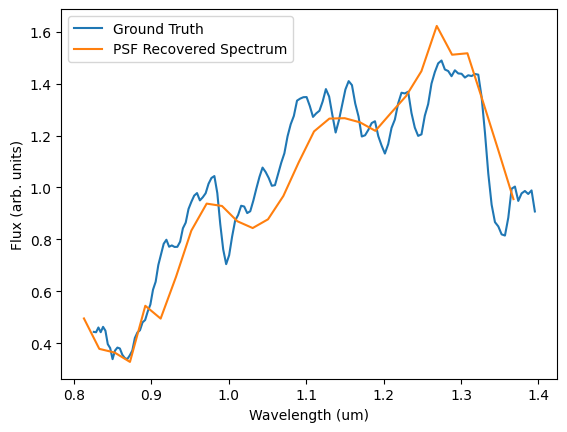

In [39]:
plt.figure(figsize=(15, 10))

xsp = xs #np.linspace(0, 2*np.pi, 15)

spec_p = np.zeros(len(xsp))
for i in range(10):
    spec_p +=  np.cos(xs * i/2) * spec_f[i]
print(spec_f[:10])
fig, ax1 = plt.subplots()

proj_data = 10**(spec_p-np.max(spec_p)) /data[0, good]#/ (data[0,good]/1e4)

#ax1.plot(data[0,good][:-1],proj_data[:-1]/(np.sum(proj_data)/len(proj_data)))
#ax2 = ax1.twinx()
ax1.plot(data[0,good], data[1,good]/(np.sum(data[1,good])/len(data[1,good])))
#ax2.set_ylim((0,np.max(data[1,good])))

ax1.plot(np.asarray(fit_wvs)+0.00, np.asarray(fit_spec)/(sum(fit_spec)/len(fit_spec)))

#ax1.plot([x/1 for x in fit_wvs], (np.asarray(fit_spec)+0.06)/max(fit_spec))
#/(np.asarray(fit_wvs)/1000)

"""xsp = xs #np.linspace(0, 2*np.pi, 15)

spec_p = np.zeros(len(xsp))
for i in range(10):
    spec_p +=  np.cos(xs * i/2) * sw[i]
ax1.plot(data[0,good],10**(spec_p-np.max(spec_p)))
"""
plt.xlabel("Wavelength (um)")
plt.ylabel("Flux (arb. units)")
plt.legend(["Ground Truth", "PSF Recovered Spectrum"])

'xsp = xs #np.linspace(0, 2*np.pi, 15)\n\nspec_p = np.zeros(len(xsp))\nfor i in range(10):\n    spec_p +=  np.cos(xs * i/2) * sw[i]\nax1.plot(data[0,good],10**(spec_p-np.max(spec_p)))\n'

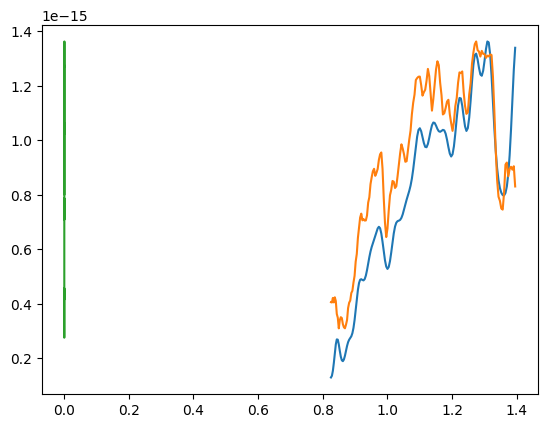

In [40]:
xsp = xs #np.linspace(0, 2*np.pi, 15)

spec_p = np.zeros(len(xsp))
for i in range(30):
    spec_p +=  np.cos(xs * i/2) * spec_f[i]
#print(spec_p)
plt.figure()

spec_proj = 10**(spec_p-np.max(spec_p))

plt.plot(data[0,good],spec_proj/np.max(spec_proj)*np.max(data[1, good]))
plt.plot(data[0,good], data[1,good])

plt.plot([x/1000 for x in fit_wvs], (np.asarray(fit_spec))/(max(fit_spec))*np.max(data[1, good]))
#/(np.asarray(fit_wvs)/1000)

#plt.plot(data_hst_all['wavelength'],data_hst_all['flux']/np.max(data_hst_all['flux'])*np.max(data[1, good]))
"""xsp = xs #np.linspace(0, 2*np.pi, 15)

spec_p = np.zeros(len(xsp))
for i in range(10):
    spec_p +=  np.cos(xs * i/2) * sw[i]
ax1.plot(data[0,good],10**(spec_p-np.max(spec_p)))
"""

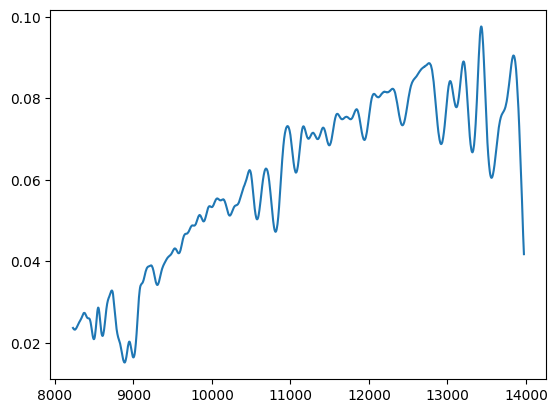

In [41]:
plt.plot(f110w[:,0], f110w[:,1])

In [42]:
np.max(f110w[:,0]*1e-4)

np.float64(1.3975)